In [35]:
import scanpy as sc

In [36]:
adata = sc.read("/home/dominikk/data/pancreas_multiome_2022_processed.h5ad")

/home/dominikk/mambaforge/envs/ott/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


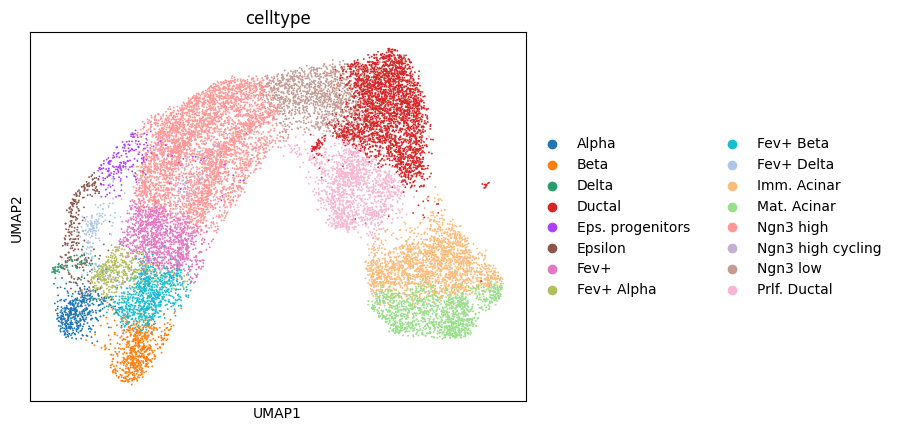

In [37]:
sc.pl.umap(adata, color="celltype")

In [38]:
cell_types_to_keep=["Alpha", "Beta", "Delta", "Epsilon", "Fev+ Alpha", "Fev+ Beta", "Fev+", "Fev+ Delta", "Eps. progenitors", "Ngn3 high", "Ngn3 low"]

In [39]:
adata_reduced = adata[adata.obs["celltype"].isin(cell_types_to_keep)].copy()

/home/dominikk/mambaforge/envs/ott/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


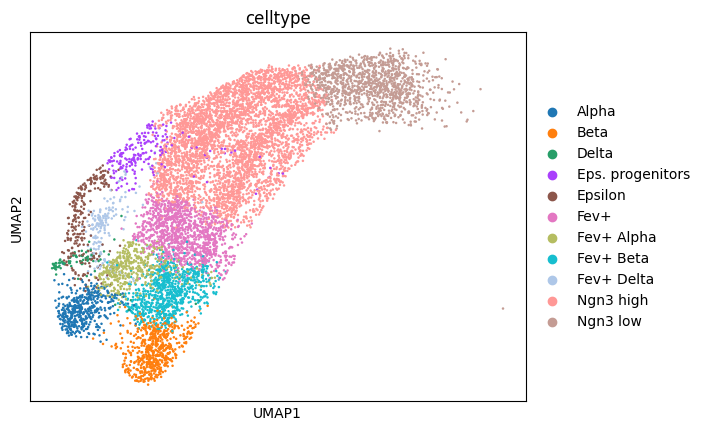

In [40]:
sc.pl.umap(adata_reduced, color="celltype")

In [41]:
adata_reduced = adata_reduced[:, adata_reduced.var["modality"]=="GEX"]

In [42]:
sc.pp.normalize_total(adata_reduced)
sc.pp.log1p(adata_reduced)
sc.pp.pca(adata_reduced)

/home/dominikk/mambaforge/envs/ott/lib/python3.10/site-packages/scanpy/preprocessing/_normalization.py:170: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


In [43]:
adata_reduced.write("/home/dominikk/data/pancreas_2022_reduced.h5ad")